In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns
from datetime import datetime
import time

In [3]:
data=pd.read_csv("10_km_Riorges.csv")

In [3]:
data.head()

,Athlète,Ligue,Performance,Naissance,Catégorie,time_delta,time_gap,duration,Nom,Prénom
0,LORTON Guillaume,ARA,N4,1989,SEM,0 days 00:30:58,0 days 00:00:00,1858.0,LORTON,Guillaume
1,BETRON Adrien,ARA,IR1,1989,SEM,0 days 00:31:30,0 days 00:00:32,1890.0,BETRON,Adrien
2,MOULIN Loic,ARA,IR2,1992,SEM,0 days 00:32:01,0 days 00:01:03,1921.0,MOULIN,Loic
3,DEBROUCKER Guillaume,ARA,IR2,1982,M1M,0 days 00:32:15,0 days 00:01:17,1935.0,DEBROUCKER,Guillaume
4,KEMEI Charles,ARA,IR2,1984,M0M,0 days 00:32:40,0 days 00:01:42,1960.0,KEMEI,Charles


In [4]:
data['h_duration'] = data['duration'].apply(lambda x : pd.to_datetime(x,unit="s").strftime('%H:%M:%S'))
data

,Athlète,Ligue,Performance,Naissance,Catégorie,time_delta,time_gap,duration,Nom,Prénom,h_duration
0,LORTON Guillaume,ARA,N4,1989,SEM,0 days 00:30:58,0 days 00:00:00,1858.0,LORTON,Guillaume,00:30:58
1,BETRON Adrien,ARA,IR1,1989,SEM,0 days 00:31:30,0 days 00:00:32,1890.0,BETRON,Adrien,00:31:30
2,MOULIN Loic,ARA,IR2,1992,SEM,0 days 00:32:01,0 days 00:01:03,1921.0,MOULIN,Loic,00:32:01
3,DEBROUCKER Guillaume,ARA,IR2,1982,M1M,0 days 00:32:15,0 days 00:01:17,1935.0,DEBROUCKER,Guillaume,00:32:15
4,KEMEI Charles,ARA,IR2,1984,M0M,0 days 00:32:40,0 days 00:01:42,1960.0,KEMEI,Charles,00:32:40
...,...,...,...,...,...,...,...,...,...,...,...
245,BARTASSOT Jean,0,D8,1980,M1M,0 days 01:05:58,0 days 00:35:00,3958.0,BARTASSOT,Jean,01:05:58
246,SURGET Laurent,0,D8,1965,M4M,0 days 01:06:37,0 days 00:35:39,3997.0,SURGET,Laurent,01:06:37
247,GENEVOIS Magali,0,D8,1986,M0F,0 days 01:07:18,0 days 00:36:20,4038.0,GENEVOIS,Magali,01:07:18
248,CAVELIER Clementine,0,D8,1990,SEF,0 days 01:07:20,0 days 00:36:22,4040.0,CAVELIER,Clementine,01:07:20


In [5]:
data['duration'].describe()

count     250.000000
mean     2809.836000
std       505.940003
min      1858.000000
25%      2380.000000
50%      2769.500000
75%      3165.500000
max      4245.000000
Name: duration, dtype: float64

Fonction permettant à l'athlète d'acquérir des données personnels sur sa performance :

In [165]:
def info_participant(x,y):
    z=data.index[data.Athlète==(y.upper()+" "+x.capitalize())]
    print("Votre temps d'arrivée est", data.loc[z[0],'h_duration'])
    print("Votre place d'arrivée est", data.index[z[0]]+1)
    print("Votre performance est classée", data.loc[z[0],'Performance'])
    print("Vous faites partie du top", math.ceil(((data.duration<=data.loc[z[0],'duration']).sum())/len(data)*100),"%")
    print("Vous êtes classé au rang", ((data[abs(data.loc[:,'Naissance']-data.loc[z[0],'Naissance'])<=5])['duration'].rank()).loc[z[0]], "parmis les",len((data[abs(data.loc[:,'Naissance']-data.loc[z[0],'Naissance'])<=5])),"athlètes ayant plus ou moins 5 ans de différence avec vous")

Exemple d'utilisation :

In [167]:
info_participant("charles","kemei")

Votre temps d'arrivée est 00:32:40
Votre place d'arrivée est 5
Votre performance est classée IR2
Vous faites partie du top 2 %
Vous êtes classé au rang 4.0 parmis les 89 athlètes ayant plus ou moins 5 ans de différence avec vous


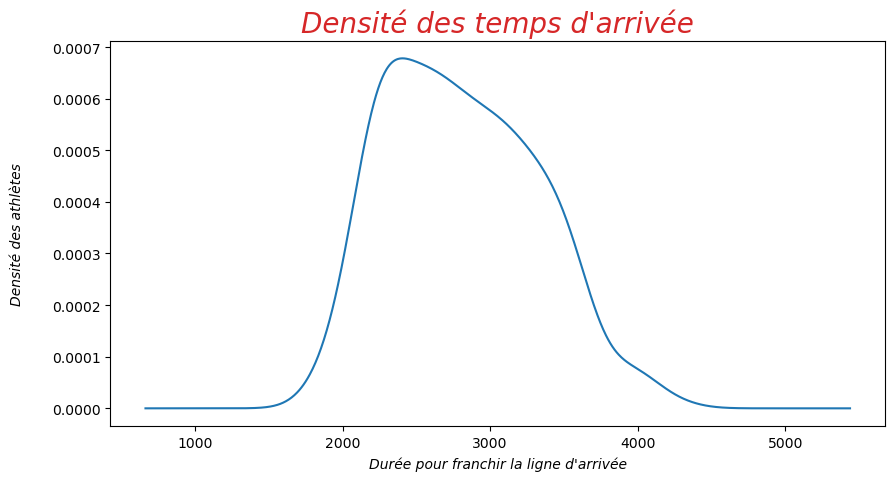

In [61]:
data['duration'].plot(kind='kde',figsize = (10,5))
plt.title("Densité des temps d'arrivée", color= 'tab:red', fontsize = '20', fontstyle = 'oblique')
plt.xlabel("Durée pour franchir la ligne d'arrivée", fontstyle = 'italic', labelpad=5)
plt.ylabel("Densité des athlètes", fontstyle = 'italic', labelpad=20)
plt.show()

In [60]:
df1=data.groupby('Naissance').agg(['count','mean','max','min','std'])
df1

/tmp/ipykernel_179/1609280655.py:1: FutureWarning: ['Athlète', 'Ligue', 'Performance', 'Catégorie', 'time_delta', 'time_gap', 'Nom', 'Prénom', 'h_duration'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1=data.groupby('Naissance').agg(['count','mean','max','min','std'])


duration                                         
             count         mean     max     min         std
Naissance                                                  
1946             1  3847.000000  3847.0  3847.0         NaN
1947             1  3260.000000  3260.0  3260.0         NaN
1950             2  2918.500000  3154.0  2683.0  333.047294
1952             1  2724.000000  2724.0  2724.0         NaN
1955             1  2762.000000  2762.0  2762.0         NaN
1956             1  3100.000000  3100.0  3100.0         NaN
1957             3  2876.666667  3537.0  2356.0  602.760594
1958             3  3013.000000  3142.0  2833.0  160.689141
1960             2  2732.000000  3018.0  2446.0  404.465079
1961             3  2841.000000  3467.0  2485.0  543.834534
1962             1  2270.000000  2270.0  2270.0         NaN
1963             2  3129.000000  3603.0  2655.0  670.337229
1964             4  2708.500000  3080.0  2307.0  318.624649
1965             4  2904.750000  3997.0  2404.0  739.257454
1966             4  3037.250000  3545.0  2329.0  511.546919
1967             2  2568.500000  2973.0  2164.0  572.049386
1968             1  3158.000000  3158.0  3158.0         NaN
1969             4  2934.750000  3603.0  2247.0  554.374347
1970             3  2544.666667  3118.0  2242.0  496.778958
1971             5  2444.200000  2856.0  2094.0  321.866743
1972             2  2520.500000  2751.0  2290.0  325.976226
1973             4  2656.000000  2885.0  2280.0  275.781314
1974             5  3043.200000  3399.0  2645.0  325.736396
1975             2  2298.000000  2334.0  2262.0   50.911688
1976             3  2518.000000  3008.0  2225.0  427.058544
1977             4  2830.000000  3339.0  2165.0  578.006344
1978             9  2680.444444  3256.0  2181.0  365.794379
1979            13  2900.461538  3560.0  2295.0  385.899947
1980            12  2931.166667  3958.0  2142.0  538.987069
1981             9  2836.333333  3927.0  2153.0  596.208646
1982             7  2505.857143  3354.0  1935.0  457.357055
1983             8  2685.500000  3625.0  1982.0  578.381733
1984             3  2730.666667  3295.0  1960.0  691.003859
1985             7  2809.571429  3560.0  2136.0  548.214027
1986             9  3023.222222  4038.0  2150.0  611.159508
1987             4  3431.750000  4245.0  2620.0  673.180201
1988             8  2893.625000  3764.0  2116.0  586.065071
1989             9  2549.666667  3280.0  1858.0  491.240522
1990            12  2982.666667  4040.0  2206.0  569.326769
1991             2  3252.000000  3544.0  2960.0  412.950360
1992             6  2770.166667  3329.0  1921.0  568.744729
1993             9  2614.666667  3322.0  2018.0  464.916390
1994             8  2814.750000  3576.0  2021.0  488.370688
1995            11  3003.727273  3576.0  2201.0  560.340805
1996             3  2725.333333  2961.0  2257.0  405.591338
1997             1  2206.000000  2206.0  2206.0         NaN
1998             2  2283.500000  2306.0  2261.0   31.819805
1999             2  2817.000000  3132.0  2502.0  445.477272
2000             5  2479.400000  3111.0  2156.0  395.288249
2001             3  2890.666667  3604.0  2144.0  730.570553
2002             7  2917.571429  3958.0  2139.0  655.807608
2003             1  2542.000000  2542.0  2542.0         NaN
2004             2  3167.500000  3287.0  3048.0  168.998521
2005             5  2352.400000  2770.0  2140.0  258.353053
2006             3  2760.000000  3057.0  2598.0  257.563584
2007             2  3227.000000  3411.0  3043.0  260.215295

Modélisation:

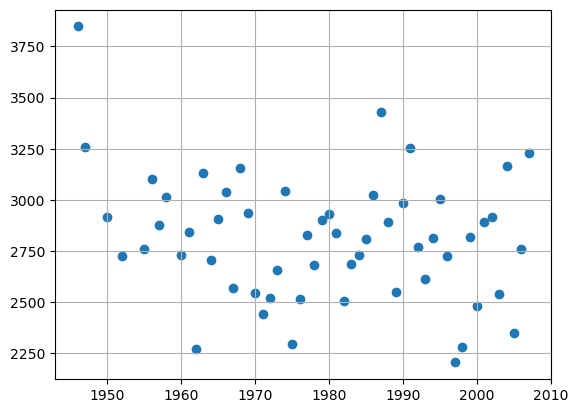

In [57]:
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(df1.index,df1.loc[:,df1.columns[1]]) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()